In [1]:
#Run this first before proceeding, this allows you to read the file and save it to a variable
import pandas as pd
#change file path to wherever you have the files
path = r'/Users/benrivera/Desktop/Test/HRTest.csv'
HR_Test= pd.read_csv(path)


    Weights Upper Body 

        Push

In [2]:
#Creats a filter to only show workouts labeld as "Weights: Push"
WPU = HR_Test.loc[HR_Test['Type']=='Weights: Push']
#resets the index
WPU = WPU.reset_index(drop=True)
#set the index
#WPU = WPU.set_index('Count')
#drop the columns that are not necessary
WPU = WPU.drop(['Workout', 'Date', 'Type', "Time (min)"], axis=1)

WPU

,Average Heart Rate (bpm),Peak Heart Rate,Count
0,118,167,1
1,102,124,2
2,100,137,3
3,107,132,4
4,99,127,5
5,99,133,6
6,103,131,7
7,99,127,8
8,110,141,9
9,109,143,10


In [3]:
#dependencies for the model

import seaborn as Snapshot
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [4]:

#Creating a prediction model that shows the potential future heart rates
train = WPU.drop(['Average Heart Rate (bpm)'], axis=1)
#Sets what is being predicted
test = WPU['Average Heart Rate (bpm)']
#splits data
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size =.25, random_state = 2)

regr = LinearRegression()

regr.fit(X_train, y_train)

pred = regr.predict(X_test)

print("Predicted average heart rate for the next few workouts are:",pred)


Predicted average heart rate for the next few workouts are: [109.0134016  101.66804014 104.27101012 115.90237435 109.29153068]


In [5]:
#shows the accuracy of the predition model
acc =regr.score(X_test, y_test)
#this turns it from a decimal to a percentage
acc = acc*100
#this prevents it from going beyond two decimal places
acc = "{:.2f}".format(acc)

print('The regression model has an accuracy of ' + acc + "%")

The regression model has an accuracy of 78.50%


In [6]:
%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


([<matplotlib.axis.XTick at 0x7fb8815778e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

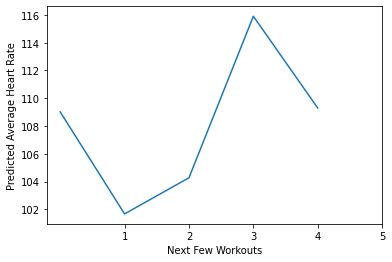

In [7]:
#plots the results
plt.plot(pred)

#changes the title for the x-axis
plt.xlabel("Next Few Workouts")
#changes the title for the y-axis
plt.ylabel("Predicted Average Heart Rate")



plt.xticks(np.arange(1, len(pred)+1, 1))

In [9]:
#Allows us to see evaluate the average hearts rate of push workouts by filtering only those types
WPU = HR_Test.loc[HR_Test['Type']=='Weights: Push']
#resets the index
WPU = WPU.reset_index(drop=True)
WPU = WPU.set_index('Workout')
#Allows us to put Date into the correlation function
WPU['Date']=WPU['Date'].astype('category').cat.codes
#Finds the correlation between Average Heart Rate over multiple workouts, 
WPU_Corr = WPU['Count'].corr(WPU['Average Heart Rate (bpm)'])
WPU_Corr = "{:.2f}".format(WPU_Corr)
print('The correlation of Average Heart Rate for pull weights over multiple workouts is ' + str(WPU_Corr))

The correlation of Average Heart Rate for pull weights over multiple workouts is 0.12


        Pull

In [8]:
#Creats a filter to only show workouts labeld as "Weights: Pull"
WPL = HR_Test.loc[HR_Test['Type']=='Weights: Pull']
#resets the index
WPL = WPL.reset_index(drop=True)
#Drop unessecary columns
WPL = WPL.drop(['Workout', 'Date', 'Type'], axis=1)
#Set the index to the count
#WPL = WPL.set_index('Count')
WPL

,Average Heart Rate (bpm),Peak Heart Rate,Time (min),Count
0,114,150,45,1
1,105,134,40,2
2,118,156,45,3
3,120,152,40,4
4,112,137,39,5
5,111,131,35,6
6,118,143,36,7
7,106,130,38,8
8,118,141,33,9
9,117,134,32,10


In [ ]:
#dependencies for the model

import seaborn as Snapshot
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
#Creating a prediction model that shows the potential future heart rates
train = WPL.drop(['Average Heart Rate (bpm)'], axis=1)
#Sets what is being predicted
test = WPL['Average Heart Rate (bpm)']
#splits data
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size =.25, random_state = 2)

regr = LinearRegression()

regr.fit(X_train, y_train)
#Makes the predition through a regression model
pred = regr.predict(X_test)
#Prints out the results
print("Predicted average heart rate for the next few workouts are:",pred)

Predicted average heart rate for the next few workouts are: [110.94863616 109.85064866 113.72211277]


In [11]:
#shows the accuracy of the predition model
acc =regr.score(X_test, y_test)
#this turns it from a decimal to a percentage
acc = acc*100
#this prevents it from going beyond two decimal places
acc = "{:.2f}".format(acc)
#Prints out the accuracy
print('The regression model has an accuracy of ' + acc + "%")

The regression model has an accuracy of 51.31%


In [12]:
%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


([<matplotlib.axis.XTick at 0x7fb860e25940>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

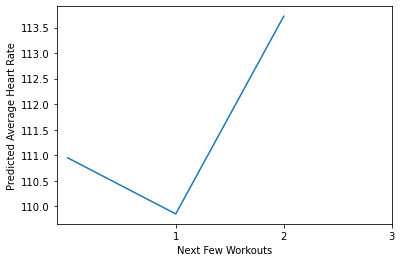

In [13]:
#plots the results
plt.plot(pred)

#changes the title for the x-axis
plt.xlabel("Next Few Workouts")
#changes the title for the y-axis
plt.ylabel("Predicted Average Heart Rate")
#adds the desired tick marks on the x=axis
plt.xticks(np.arange(1, len(pred)+1, 1))

In [ ]:
#Allows us to see evaluate the average hearts rate of pull workouts by filtering only those types
WPL = HR_Test.loc[HR_Test['Type']=='Weights: Pull']
#resets the index
WPL = WPL.reset_index(drop=True)
WPL = WPL.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
WPL_Corr = WPL['Count'].corr(WPL['Average Heart Rate (bpm)'])
WPL_Corr = "{:.2f}".format(WPL_Corr )
print('The correlation of Average Heart Rate for pull weights over multiple workouts is ' + str(WPL_Corr))

    Weigths: Lower Body 

In [ ]:
WLB = HR_Test.loc[HR_Test['Type']=='Weights: Legs']
#resets index
WLB = WLB.reset_index(drop=True)
#Drop unessecary columns
WLB = WLB.drop(['Workout', 'Date', 'Type'], axis=1)


WLB

In [ ]:
#dependencies for the model

import seaborn as Snapshot
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Creating a prediction model that shows the potential future heart rates
train = WLB.drop(['Average Heart Rate (bpm)'], axis=1)
#Sets what is being predicted
test = WLB['Average Heart Rate (bpm)']
#splits data
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size =.25, random_state = 2)

regr = LinearRegression()

regr.fit(X_train, y_train)
#Makes the predition through a regression model
pred = regr.predict(X_test)
#Prints out the results
print("Predicted average heart rate for the next few workouts are:",pred)

In [ ]:
#shows the accuracy of the predition model
acc =regr.score(X_test, y_test)
#this turns it from a decimal to a percentage
acc = acc*100
#this prevents it from going beyond two decimal places
acc = "{:.2f}".format(acc)
#Prints out the accuracy
print('The regression model has an accuracy of ' + acc + "%")

In [ ]:
%pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
#plots the results
plt.plot(pred)

#changes the title for the x-axis
plt.xlabel("Next Few Workouts")
#changes the title for the y-axis
plt.ylabel("Predicted Average Heart Rate")
#adds the desired tick marks on the x=axis
plt.xticks(np.arange(1, len(pred)+1, 1))

In [ ]:
WLB = HR_Test.loc[HR_Test['Type']=='Weights: Legs']
#resets index
WLB = WLB.reset_index(drop=True)
WLB = WLB.set_index('Workout')
#Finds the correlation between Average Heart Rate over multiple workouts, 
WLB_Corr = WLB['Count'].corr(WLB['Average Heart Rate (bpm)'])
WLB_Corr = "{:.2f}".format(WLB_Corr )
print('The correlation of Average Heart Rate for leg weights over multiple workouts is ' + str(WLB_Corr))